# **Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# **Define Columns Name:**

In [2]:
#Column names for the dataset
columns = [
'age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# **Load the Dataset:**

In [3]:
#Loading the dataset
url=r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url, header=None, names=columns, na_values='?')
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.shape

(303, 14)

# **Data Preprocessing:**

In [5]:
#Dropping missing values
data.dropna(inplace=True)
data.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
data.shape

(297, 14)

In [7]:
#Converting target variable to binary classification (0: No Heart Disease, 1: Heart Disease)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# **Data Splitting:**

In [8]:
#Splitting the data into features and target
X= data.drop('target', axis=1)
y = data['target']

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Logistic Regression Model**

In [9]:
#Creating and training the Logistic Regression model
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
#Predicting on the test set
y_pred=model.predict(X_test)

# **Model Evaluation:**

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

Confusion Matrix:
 [[32  4]
 [ 3 21]]
Accuracy Score:  0.8833333333333333


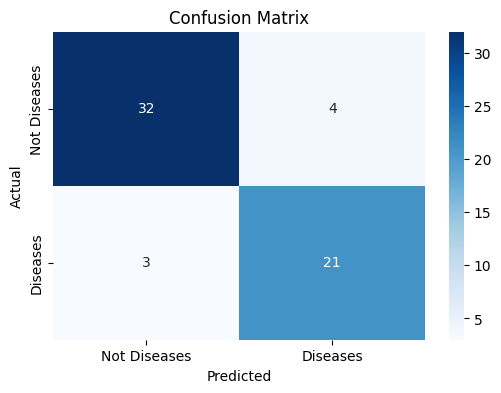

In [11]:
#Evaluating the model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diseases','Diseases'], yticklabels=['Not Diseases','Diseases'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

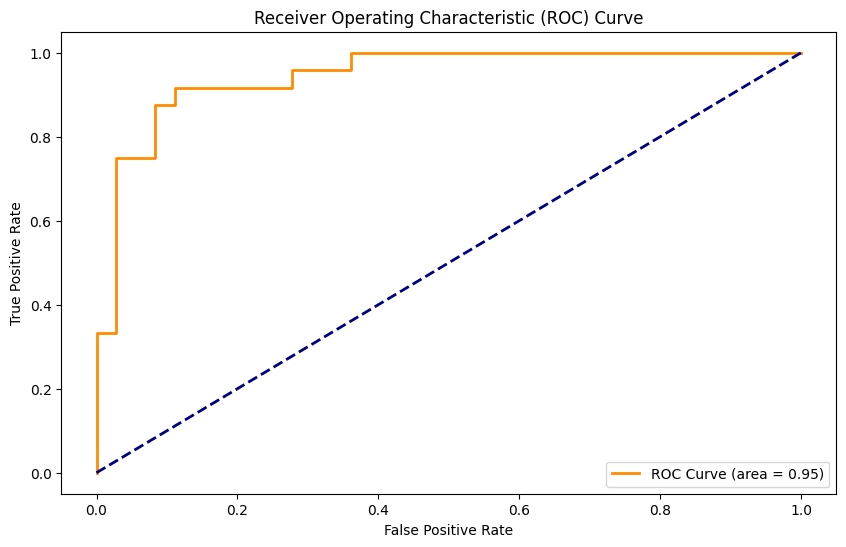

In [12]:
#ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test) [:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

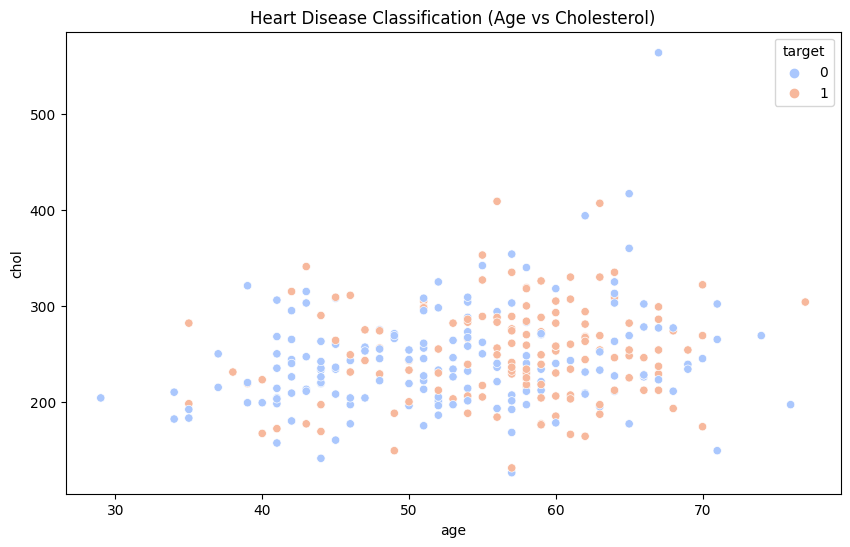

In [13]:
#Visualizing the classification
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=data, palette='coolwarm')
plt.title('Heart Disease Classification (Age vs Cholesterol)')
plt.show()

In [14]:
#Predicting a new record
new_record = pd.DataFrame([[60, 1, 3, 130, 206, 0, 0, 132, 1, 2.4, 1, 0, 3]], columns=X.columns)
prediction = model.predict(new_record)
print(f"The predicted class for the new record is: {'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'}")


The predicted class for the new record is: No Heart Disease


In [15]:
#Displaying classification results in a table
results=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(f"\nSample Classification Result\n:", results.head())


Sample Classification Result
:      Actual  Predicted
169       0          0
214       1          0
63        0          0
155       1          1
5         0          0


# **Save the Model**

In [16]:
import joblib

joblib.dump(model, "heart_diseases_model.pkl")


['heart_diseases_model.pkl']